## 기상과 지하철 혼잡도 데이터 정규변환 후 Pearson 상관분석(월별, 계절별별)

In [2]:
pip install koreanize-matplotlib

  Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl.metadata (992 bytes)
Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl (7.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import koreanize_matplotlib
import numpy as np

In [ ]:

FILE_NAME_21 = 'dataset_csv_file/train_subway21.csv'
FILE_NAME_22 = 'dataset_csv_file/train_subway22.csv'
FILE_NAME_23 = 'dataset_csv_file/train_subway23.csv'

train_subway21_df = pd.read_csv(FILE_NAME_21)
train_subway22_df = pd.read_csv(FILE_NAME_22)
train_subway23_df = pd.read_csv(FILE_NAME_23)


In [5]:
print(train_subway21_df.columns)
print(train_subway22_df.columns)
print(train_subway23_df.columns)

Index(['train_subway21.tm', 'train_subway21.line',
       'train_subway21.station_number', 'train_subway21.station_name',
       'train_subway21.direction', 'train_subway21.stn', 'train_subway21.ta',
       'train_subway21.wd', 'train_subway21.ws', 'train_subway21.rn_day',
       'train_subway21.rn_hr1', 'train_subway21.hm', 'train_subway21.si',
       'train_subway21.ta_chi', 'train_subway21.congestion'],
      dtype='object')
Index(['train_subway22.tm', 'train_subway22.line',
       'train_subway22.station_number', 'train_subway22.station_name',
       'train_subway22.direction', 'train_subway22.stn', 'train_subway22.ta',
       'train_subway22.wd', 'train_subway22.ws', 'train_subway22.rn_day',
       'train_subway22.rn_hr1', 'train_subway22.hm', 'train_subway22.si',
       'train_subway22.ta_chi', 'train_subway22.congestion'],
      dtype='object')
Index(['train_subway23.tm', 'train_subway23.line',
       'train_subway23.station_number', 'train_subway23.station_name',
       'train_

In [3]:
train_subway21_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway22_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway23_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']

In [4]:
train_subway_df = train_subway21_df.copy()
train_subway_df = pd.concat([train_subway_df, train_subway22_df])
train_subway_df.reset_index(inplace=True, drop=True)

train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848338,2022123119,8,2828,남위례,하선,572,-1.6,199.0,0.2,0.0,0.0,67.7,-99.0,-2.1,19
10848339,2022123120,8,2828,남위례,하선,572,-2.6,0.0,0.0,0.0,0.0,73.7,-99.0,-3.2,16
10848340,2022123121,8,2828,남위례,하선,572,-2.9,17.0,0.0,0.0,0.0,75.1,-99.0,-3.7,21
10848341,2022123122,8,2828,남위례,하선,572,-3.1,185.3,0.1,0.0,0.0,75.7,-99.0,-3.9,20


In [5]:
train_subway_df = pd.concat([train_subway_df, train_subway23_df])
train_subway_df.reset_index(inplace=True, drop=True)

train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,-99.0,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,-99.0,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,-99.0,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,-99.0,-1.3,18


In [6]:
# 추가 결측치 반영 
# 풍향 변수 -9.9 -> 결측치

none_index = train_subway_df[train_subway_df['WD']==-9.9].index
train_subway_df.loc[none_index, 'WD'] = -99.0

In [7]:
train_subway_df[train_subway_df['WD']==-9.9]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion


In [8]:
train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,-99.0,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,-99.0,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,-99.0,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,-99.0,-1.3,18


### 결측치 처리

In [9]:
train_subway_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [10]:
for column in train_subway_df.columns:

    none_index = train_subway_df[train_subway_df[column]==-99.0].index
    train_subway_df.loc[none_index, column] =  None

In [11]:
train_subway_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                 216468
WD                 287270
WS                 230786
RN_DAY             351574
RN_HR1             360796
HM                 844594
SI                6064242
ta_chi                352
Congestion              0
dtype: int64

### 데이터 확인

In [12]:
train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,NaN,NaN,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,NaN,NaN,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,NaN,NaN,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,NaN,NaN,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,NaN,NaN,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,NaN,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,NaN,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,NaN,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,NaN,-1.3,18


1. 결측치 제거 후 이상치 확인

In [13]:
train_subway_dropna_df = train_subway_df.dropna()
train_subway_dropna_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [14]:
train_subway_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                 216468
WD                 287270
WS                 230786
RN_DAY             351574
RN_HR1             360796
HM                 844594
SI                6064242
ta_chi                352
Congestion              0
dtype: int64

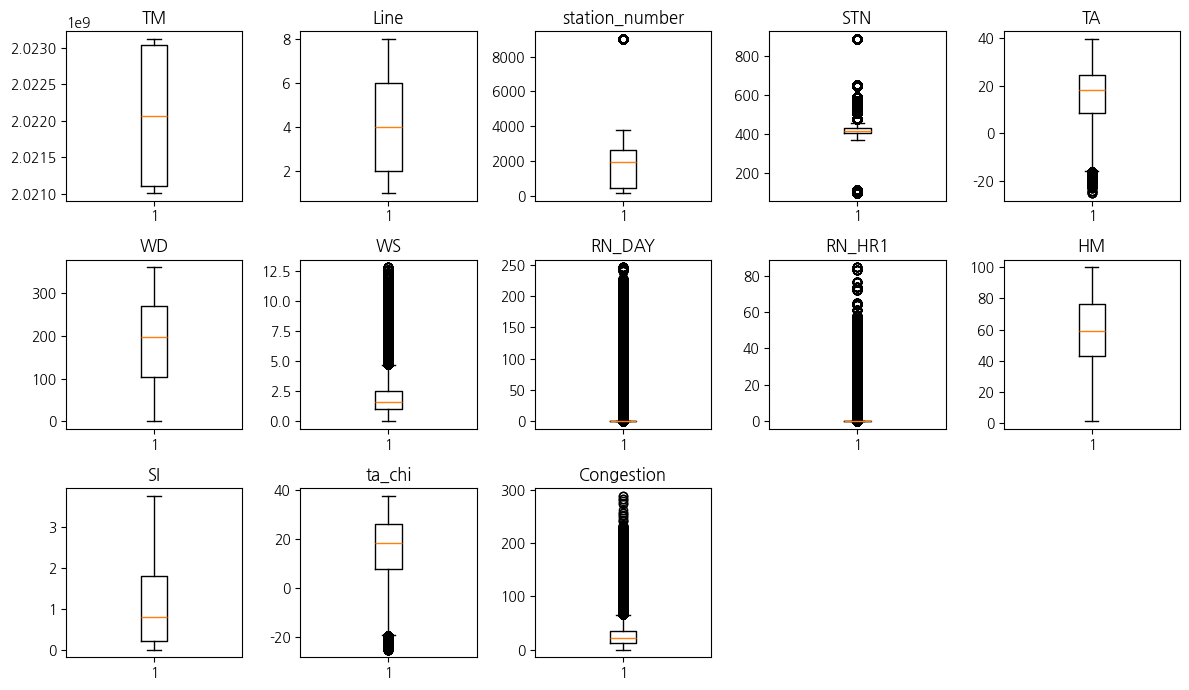

In [12]:
col = 3
row = 5

plt.figure(figsize=(12,7))

# 수치형 데이터만 boxplot 그리도록
for i, column_name in enumerate(train_subway_dropna_df.select_dtypes(include=np.number).columns,1):
  # 인덱스를 1로 지정
  plt.subplot(col, row, i)
  plt.title(column_name)
  plt.boxplot(train_subway_dropna_df[column_name])

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

station_number 이상치 확인

In [13]:
train_subway_dropna_df[train_subway_dropna_df['station_number'] >= 8000]['station_number'].unique()

array([9001, 9006])

In [14]:
train_subway_dropna_df[train_subway_dropna_df['station_number']==9001]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
1609655,2021010108,2,9001,성수E,내선,427,-9.1,96.9,0.5,0.0,0.0,75.5,0.00,-10.0,0
1609656,2021010109,2,9001,성수E,내선,427,-6.8,0.0,0.0,0.0,0.0,71.7,0.15,-7.1,0
1609657,2021010110,2,9001,성수E,내선,427,-4.4,128.6,0.7,0.0,0.0,60.5,0.65,-4.9,0
1609658,2021010111,2,9001,성수E,내선,427,-2.3,136.6,0.8,0.0,0.0,55.9,1.20,-2.3,0
1609659,2021010112,2,9001,성수E,내선,427,-2.1,97.7,0.8,0.0,0.0,59.1,1.48,-1.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12470877,2023123114,2,9001,성수E,외선,427,5.9,317.9,2.3,5.0,0.0,75.7,0.72,3.8,27
12470878,2023123115,2,9001,성수E,외선,427,5.7,316.3,1.9,5.0,0.0,76.8,1.03,3.3,32
12470879,2023123116,2,9001,성수E,외선,427,5.3,311.4,1.6,5.0,0.0,78.9,0.45,2.8,30
12470880,2023123117,2,9001,성수E,외선,427,4.7,319.4,1.3,5.0,0.0,80.7,0.21,2.5,35


In [15]:
train_subway_dropna_df[train_subway_dropna_df['station_number']==9006]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
4374555,2021010108,6,9006,응암S,상선,400,-8.4,81.7,0.4,0.0,0.0,68.8,0.00,-8.9,0
4374556,2021010109,6,9006,응암S,상선,400,-6.9,128.2,0.5,0.0,0.0,65.4,0.27,-7.8,0
4374557,2021010110,6,9006,응암S,상선,400,-5.1,87.3,0.9,0.0,0.0,57.4,0.76,-5.4,0
4374558,2021010111,6,9006,응암S,상선,400,-2.5,125.5,1.2,0.0,0.0,49.4,1.40,-3.2,0
4374559,2021010112,6,9006,응암S,상선,400,-1.6,36.2,0.9,0.0,0.0,46.4,1.74,-1.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283850,2023123018,6,9006,응암S,하선,400,1.4,134.4,0.9,1.0,0.0,95.3,0.00,1.2,19
15283861,2023123108,6,9006,응암S,하선,400,2.0,283.9,1.9,12.0,4.5,97.8,0.01,0.0,8
15283862,2023123109,6,9006,응암S,하선,400,1.8,280.2,2.2,12.5,0.5,96.7,0.04,-0.2,13
15283863,2023123110,6,9006,응암S,하선,400,2.2,293.9,1.4,13.0,0.5,94.9,0.07,0.2,15


STN 이상치 확인

In [16]:
train_subway_dropna_df[train_subway_dropna_df['STN'] >= 800]['STN'].unique()

array([889])

In [17]:
train_subway_dropna_df[train_subway_dropna_df['STN']==889]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
1272395,2021010108,2,222,강남,내선,889,-10.0,226.2,0.7,0.0,0.0,77.5,0.00,-7.4,3
1272396,2021010109,2,222,강남,내선,889,-8.9,228.5,0.3,0.0,0.0,75.9,0.27,-6.7,4
1272397,2021010110,2,222,강남,내선,889,-4.1,191.6,0.2,0.0,0.0,62.2,0.76,-4.8,6
1272398,2021010111,2,222,강남,내선,889,-2.2,50.6,0.9,0.0,0.0,49.8,1.40,-2.7,8
1272399,2021010112,2,222,강남,내선,889,-0.4,76.9,0.6,0.0,0.0,47.8,1.74,-1.1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757795,2023123114,7,2741,상도,하선,889,3.9,264.1,0.8,6.5,0.0,89.3,0.18,3.1,20
15757796,2023123115,7,2741,상도,하선,889,4.6,263.5,1.0,6.5,0.0,85.1,0.65,3.9,22
15757797,2023123116,7,2741,상도,하선,889,4.6,225.5,0.6,6.5,0.0,88.3,0.66,4.4,23
15757798,2023123117,7,2741,상도,하선,889,3.9,335.1,0.5,6.5,0.0,92.9,0.26,4.1,24


Congestion 추가 이상치 확인

In [18]:
train_subway_dropna_df[(train_subway_dropna_df['Congestion']==0) & (train_subway_dropna_df['Line'] == 4) & (train_subway_dropna_df['station_name']!='남위례')]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
2299504,2021010108,4,409,당고개,상선,406,-11.6,276.1,0.2,0.0,0.0,82.1,0.00,-11.4,0
2299505,2021010109,4,409,당고개,상선,406,-10.5,152.4,0.3,0.0,0.0,84.3,0.27,-10.3,0
2299506,2021010110,4,409,당고개,상선,406,-6.5,207.0,0.8,0.0,0.0,67.4,0.76,-6.7,0
2299507,2021010111,4,409,당고개,상선,406,-4.0,153.8,1.9,0.0,0.0,56.6,1.40,-4.0,0
2299508,2021010112,4,409,당고개,상선,406,-2.3,115.6,0.8,0.0,0.0,50.2,1.74,-2.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907948,2023123114,4,1762,오이도,하선,565,3.9,259.0,2.8,4.0,0.0,83.6,0.72,2.9,0
13907949,2023123115,4,1762,오이도,하선,565,5.0,284.7,1.7,4.0,0.0,79.2,1.03,4.8,0
13907950,2023123116,4,1762,오이도,하선,565,4.8,300.4,1.4,4.0,0.0,77.3,0.45,4.9,0
13907951,2023123117,4,1762,오이도,하선,565,4.5,0.0,0.0,4.0,0.0,80.7,0.21,4.5,0


In [19]:
train_subway_dropna_df[train_subway_dropna_df['Congestion']==0]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
7376,2021121808,1,150,서울역,상선,419,-10.9,200.7,2.9,0.0,0.0,42.8,0.01,-11.9,0
7377,2021121809,1,150,서울역,상선,419,-10.3,186.6,2.1,0.0,0.0,40.4,0.36,-9.6,0
7378,2021121810,1,150,서울역,상선,419,-9.3,178.3,2.3,0.0,0.0,40.8,0.92,-6.6,0
7379,2021121811,1,150,서울역,상선,419,-7.6,181.8,2.1,0.0,0.0,37.7,1.46,-7.5,0
7380,2021121812,1,150,서울역,상선,419,-5.1,121.2,0.5,0.0,0.0,32.8,1.69,-3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16354026,2023123114,8,2827,모란,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,0
16354027,2023123115,8,2827,모란,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,0
16354028,2023123116,8,2827,모란,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,0
16354029,2023123117,8,2827,모란,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,0


In [20]:
train_subway_dropna_df[(train_subway_dropna_df['station_name']=='남위례') & (train_subway_dropna_df['Congestion']==0)]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
5451728,2021122208,8,2828,남위례,상선,572,-2.9,200.5,0.1,0.0,0.0,62.7,0.01,-3.8,0
5451729,2021122209,8,2828,남위례,상선,572,-0.9,295.5,0.5,0.0,0.0,52.5,0.31,-1.7,0
5451730,2021122210,8,2828,남위례,상선,572,0.7,329.2,0.9,0.0,0.0,44.5,0.85,1.0,0
5451731,2021122211,8,2828,남위례,상선,572,2.4,318.7,0.7,0.0,0.0,41.0,1.39,3.6,0
5451732,2021122212,8,2828,남위례,상선,572,4.2,351.2,0.8,0.0,0.0,34.0,1.71,5.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452133,2021123114,8,2828,남위례,하선,572,-3.1,343.7,2.1,0.0,0.0,21.9,1.91,-4.8,0
5452134,2021123115,8,2828,남위례,하선,572,-3.6,311.7,3.2,0.0,0.0,21.2,1.59,-6.2,0
5452135,2021123116,8,2828,남위례,하선,572,-3.1,334.9,2.0,0.0,0.0,22.2,1.02,-5.8,0
5452136,2021123117,8,2828,남위례,하선,572,-4.6,313.6,2.1,0.0,0.0,21.4,0.47,-7.7,0


In [21]:
train_subway_dropna_df[(train_subway_dropna_df['Congestion']==0) & (train_subway_dropna_df['Line'] == 4) & (train_subway_dropna_df['station_name']!='남위례')]['station_name'].unique()

array(['당고개', '상계', '노원', '창동', '쌍문', '수유', '미아', '미아사거리', '길음', '성신여대입구',
       '한성대입구', '혜화', '동대문', '동대문역사문화공원', '충무로', '명동', '회현', '서울역',
       '숙대입구', '삼각지', '신용산', '이촌', '동작', '총신대입구', '사당', '남태령', '선바위',
       '경마공원', '대공원', '과천', '정부과천청사', '인덕원', '평촌', '범계', '금정', '산본',
       '대야미', '반월', '상록수', '한대앞', '중앙', '고잔', '초지', '안산', '능길', '정왕',
       '오이도', '수리산', '진접', '오남', '별내별가람'], dtype=object)

In [15]:
# 남위례 Congestion 0 제거 

zero_index =train_subway_dropna_df[(train_subway_dropna_df['station_name']=='남위례') & (train_subway_dropna_df['Congestion']==0)].index
train_subway_dropna_0_df = train_subway_dropna_df.drop(zero_index)
train_subway_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
4259,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10
4266,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14
4267,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32
4268,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48
4269,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369314,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13
16369315,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14
16369316,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16
16369317,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19


2. 데이터 분포 확인

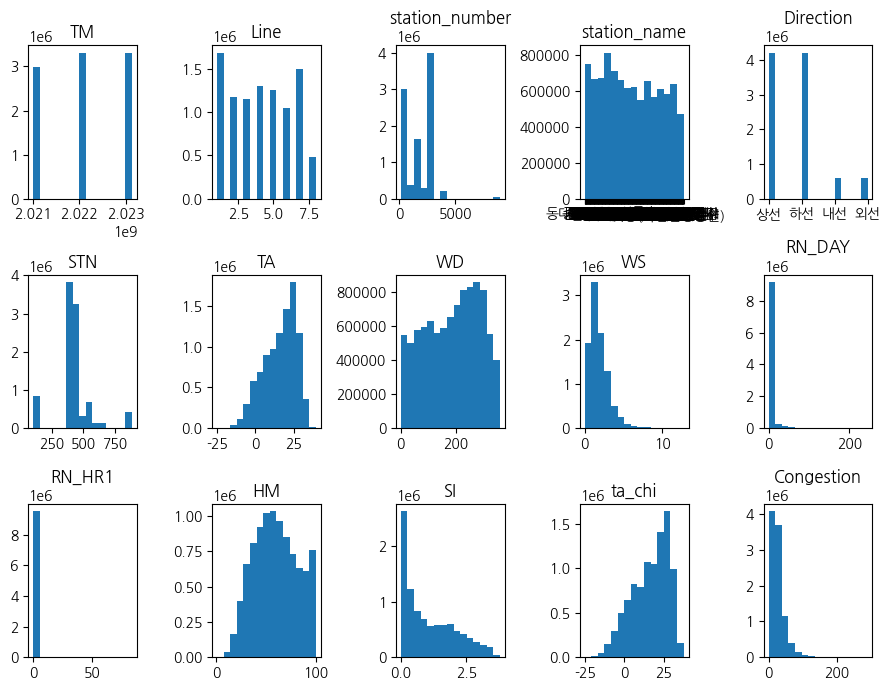

In [16]:
col = 3
row = 5

plt.figure(figsize=(9,7))

for i, column_name in enumerate(train_subway_dropna_0_df.columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(train_subway_dropna_0_df[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

### 데이터 전처리

In [20]:
train_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369324 entries, 0 to 16369323
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TM              int64  
 1   Line            int64  
 2   station_number  int64  
 3   station_name    object 
 4   Direction       object 
 5   STN             int64  
 6   TA              float64
 7   WD              float64
 8   WS              float64
 9   RN_DAY          float64
 10  RN_HR1          float64
 11  HM              float64
 12  SI              float64
 13  ta_chi          float64
 14  Congestion      int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 1.8+ GB


In [16]:
train_subway_preprocess_df = train_subway_dropna_0_df.copy()

In [25]:
from scipy.stats import boxcox

In [ ]:
# # 정규 변환 

# # 제곱 변환 
# train_subway_preprocess_df[['ta_chi']] = train_subway_preprocess_df[['ta_chi']].astype(float)
# train_subway_preprocess_df.loc[:,['ta_chi']] = pow(train_subway_preprocess_df.loc[:,['ta_chi']],2)
# # 제곱근 변환
# train_subway_preprocess_df[['HM','TA','WS', 'RN_DAY', 'RN_HR1', 'SI', 'Congestion', 'STN','WD']] = train_subway_preprocess_df[['HM','TA','WS', 'RN_DAY', 'RN_HR1', 'SI', 'Congestion', 'STN','WD']].astype(float)
# train_subway_preprocess_df.loc[:,['HM','TA','WS', 'RN_DAY', 'RN_HR1', 'SI', 'STN','WD']] = np.sqrt(train_subway_preprocess_df.loc[:,['HM','TA','WS', 'RN_DAY', 'RN_HR1', 'SI', 'STN','WD']])


c:\Users\sh321\anaconda3\envs\weather_contest_39_1\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [ ]:
# from sklearn.preprocessing import PowerTransformer

In [ ]:
# # Yeo-Johnson 변환
# pt = PowerTransformer(method='yeo-johnson')
# train_subway_preprocess_df[['TA','HM','ta_chi','WD']] = train_subway_preprocess_df[['TA','HM','ta_chi','WD']].astype(float)
# train_subway_preprocess_df.loc[:,['TA','HM','ta_chi','WD']] = pt.fit_transform(train_subway_preprocess_df.loc[:,['TA','HM','ta_chi','WD']])

# # 로그 변환 
# train_subway_preprocess_df[['WS', 'RN_DAY', 'RN_HR1', 'SI', 'Congestion', 'STN']] = train_subway_preprocess_df[['WS', 'RN_DAY', 'RN_HR1', 'SI', 'Congestion', 'STN']].astype(float)
# train_subway_preprocess_df.loc[:,['WS', 'RN_DAY', 'RN_HR1', 'SI', 'Congestion', 'STN']] = np.log1p(train_subway_preprocess_df.loc[:,['WS', 'RN_DAY', 'RN_HR1', 'SI', 'Congestion', 'STN']])

In [17]:
# 최종 변환 

# 제곱근 변환
train_subway_preprocess_df[['STN','WS','SI']] = train_subway_preprocess_df[['STN','WS','SI']].astype(float)
train_subway_preprocess_df.loc[:,['STN','WS','SI']] = np.sqrt(train_subway_preprocess_df.loc[:,['STN','WS','SI']])

# 로그 변환 
train_subway_preprocess_df[['Congestion']] = train_subway_preprocess_df[['Congestion']].astype(float)
train_subway_preprocess_df.loc[:,['Congestion']] = np.log1p(train_subway_preprocess_df.loc[:,['Congestion']])


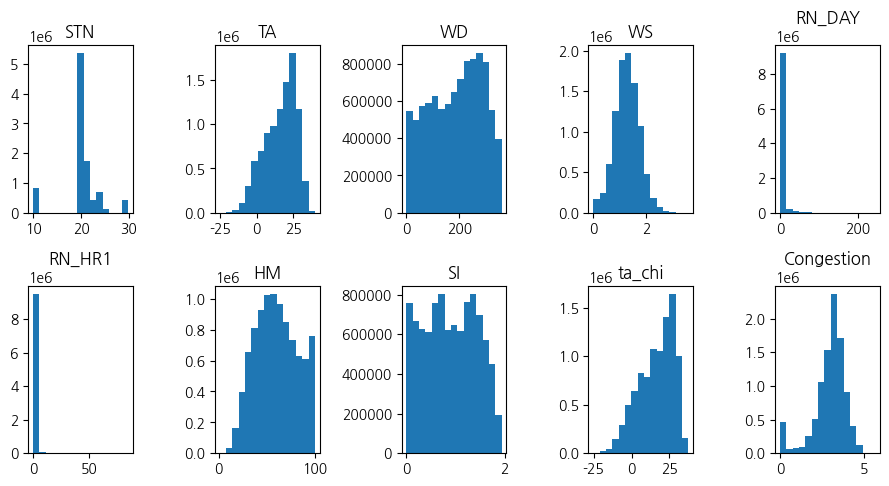

In [25]:
col = 3
row = 5

plt.figure(figsize=(9,7))
column_list = ['STN', 'TA', 'WD', 'WS', 'RN_DAY', 'RN_HR1', 'HM', 'SI', 'ta_chi', 'Congestion']

for i, column_name in enumerate(column_list,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(train_subway_preprocess_df[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

### 기상과 지하철 혼잡도 Pearson 상관분석

In [18]:
train_subway_preprocess_df.corr(numeric_only=True)

,TM,Line,station_number,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
TM,1.000000,0.002129,-0.009197,0.010065,0.005311,0.036052,-0.020074,0.041429,0.020355,-0.002547,0.016546,0.008314,0.184815
Line,0.002129,1.000000,0.639598,0.130112,0.014041,-0.010298,-0.022406,0.002198,0.000928,-0.047287,0.014927,0.012929,-0.044373
station_number,-0.009197,0.639598,1.000000,-0.013505,0.004812,-0.000927,-0.019041,0.001210,0.000584,-0.004636,-0.000068,0.005182,-0.180205
STN,0.010065,0.130112,-0.013505,1.000000,0.012214,-0.014067,-0.227307,-0.000623,-0.000292,0.007745,0.007176,0.012890,0.117163
TA,0.005311,0.014041,0.004812,0.012214,1.000000,-0.083182,-0.014947,0.092977,0.052924,0.170678,0.233569,0.992142,0.027786
WD,0.036052,-0.010298,-0.000927,-0.014067,-0.083182,1.000000,0.199813,-0.033512,-0.038820,-0.189701,0.082932,-0.106424,0.011506
WS,-0.020074,-0.022406,-0.019041,-0.227307,-0.014947,0.199813,1.000000,0.020262,0.015372,-0.285644,0.249639,-0.053763,0.027526
RN_DAY,0.041429,0.002198,0.001210,-0.000623,0.092977,-0.033512,0.020262,1.000000,0.513591,0.315927,-0.175248,0.119800,-0.011087
RN_HR1,0.020355,0.000928,0.000584,-0.000292,0.052924,-0.038820,0.015372,0.513591,1.000000,0.214284,-0.137300,0.073137,-0.007947
HM,-0.002547,-0.047287,-0.004636,0.007745,0.170678,-0.189701,-0.285644,0.315927,0.214284,1.000000,-0.541204,0.238306,-0.090970


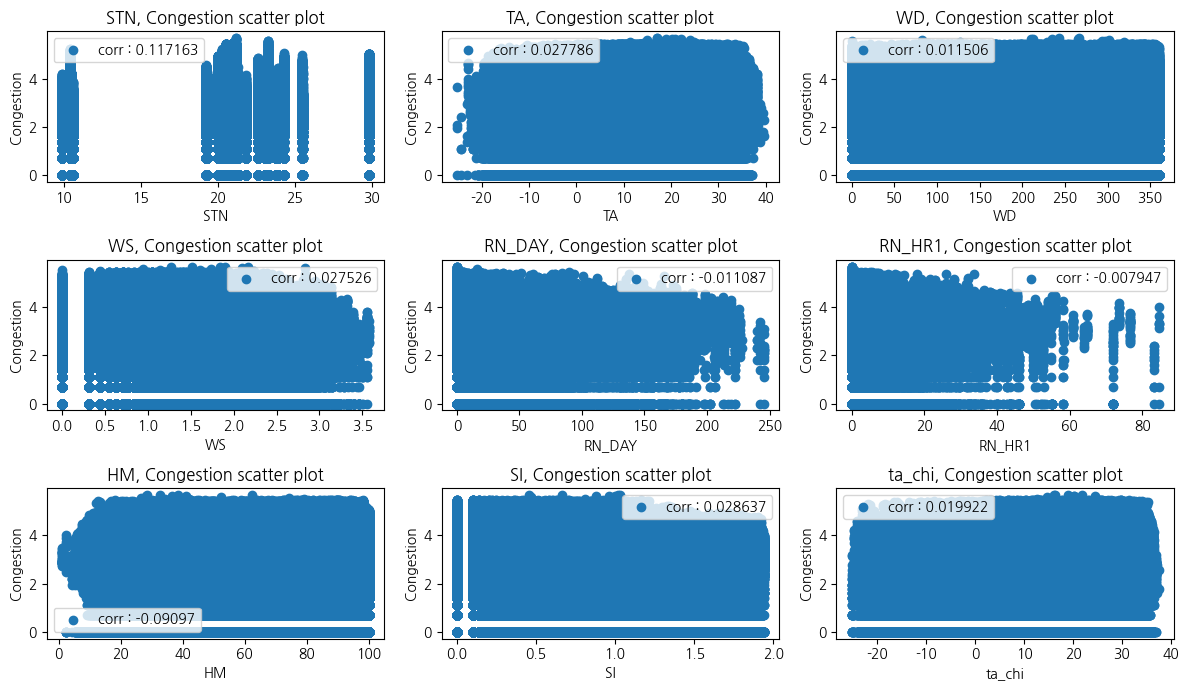

In [19]:
col = 3 
row = 3 
column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']

plt.figure(figsize=(12,7))

for i, colum_name in enumerate(column_list,1):
    plt.subplot(col, row, i)
    plt.title(f'{colum_name}, Congestion scatter plot')
    corr_result = train_subway_preprocess_df[[colum_name, 'Congestion']].corr().iloc[0,1]
    plt.scatter(train_subway_preprocess_df[colum_name], train_subway_preprocess_df['Congestion'], label=f'corr : {round(corr_result,6)}')
    plt.xlabel(colum_name)
    plt.ylabel('Congestion')
    plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [20]:
train_subway_df_month_process = train_subway_preprocess_df.copy()
train_subway_df_month_process

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
4259,2021072220,1,150,서울역,상선,20.469489,30.6,288.1,0.836660,0.0,0.0,54.3,0.282843,30.2,2.397895
4266,2021072306,1,150,서울역,상선,20.469489,25.8,168.7,0.894427,0.0,0.0,73.5,0.141421,27.2,2.708050
4267,2021072307,1,150,서울역,상선,20.469489,27.0,156.9,1.224745,0.0,0.0,71.7,0.632456,28.4,3.496508
4268,2021072308,1,150,서울역,상선,20.469489,27.7,162.1,1.264911,0.0,0.0,67.1,0.994987,30.0,3.891820
4269,2021072309,1,150,서울역,상선,20.469489,28.1,145.6,1.414214,0.0,0.0,65.9,1.307670,31.1,3.555348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369314,2023123114,8,2828,남위례,하선,23.916521,3.0,306.0,1.048809,7.0,0.0,75.8,0.424264,2.7,2.639057
16369315,2023123115,8,2828,남위례,하선,23.916521,3.7,24.7,1.095445,7.0,0.0,73.0,0.806226,3.5,2.708050
16369316,2023123116,8,2828,남위례,하선,23.916521,4.2,7.0,0.836660,7.0,0.0,71.5,0.812404,3.8,2.833213
16369317,2023123117,8,2828,남위례,하선,23.916521,3.7,303.4,0.447214,7.0,0.0,72.6,0.509902,3.4,2.995732


In [21]:
train_subway_df_month_process['month'] = 0

for i in range(train_subway_df_month_process.shape[0]):
    tm_data = str(train_subway_df_month_process.iloc[i,0])
    train_subway_df_month_process.iloc[i,-1] = int(tm_data[4:6])

In [22]:
train_subway_df_month_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9594136 entries, 4259 to 16369318
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TM              int64  
 1   Line            int64  
 2   station_number  int64  
 3   station_name    object 
 4   Direction       object 
 5   STN             float64
 6   TA              float64
 7   WD              float64
 8   WS              float64
 9   RN_DAY          float64
 10  RN_HR1          float64
 11  HM              float64
 12  SI              float64
 13  ta_chi          float64
 14  Congestion      float64
 15  month           int64  
dtypes: float64(10), int64(4), object(2)
memory usage: 1.2+ GB


In [23]:
train_subway_df_month_process

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion,month
4259,2021072220,1,150,서울역,상선,20.469489,30.6,288.1,0.836660,0.0,0.0,54.3,0.282843,30.2,2.397895,7
4266,2021072306,1,150,서울역,상선,20.469489,25.8,168.7,0.894427,0.0,0.0,73.5,0.141421,27.2,2.708050,7
4267,2021072307,1,150,서울역,상선,20.469489,27.0,156.9,1.224745,0.0,0.0,71.7,0.632456,28.4,3.496508,7
4268,2021072308,1,150,서울역,상선,20.469489,27.7,162.1,1.264911,0.0,0.0,67.1,0.994987,30.0,3.891820,7
4269,2021072309,1,150,서울역,상선,20.469489,28.1,145.6,1.414214,0.0,0.0,65.9,1.307670,31.1,3.555348,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369314,2023123114,8,2828,남위례,하선,23.916521,3.0,306.0,1.048809,7.0,0.0,75.8,0.424264,2.7,2.639057,12
16369315,2023123115,8,2828,남위례,하선,23.916521,3.7,24.7,1.095445,7.0,0.0,73.0,0.806226,3.5,2.708050,12
16369316,2023123116,8,2828,남위례,하선,23.916521,4.2,7.0,0.836660,7.0,0.0,71.5,0.812404,3.8,2.833213,12
16369317,2023123117,8,2828,남위례,하선,23.916521,3.7,303.4,0.447214,7.0,0.0,72.6,0.509902,3.4,2.995732,12


In [24]:
def month_scatter_plot(month):
    col = 3 
    row = 3 
    column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']
    train_subway_df_choice_month = train_subway_df_month_process[train_subway_df_month_process['month']==month]

    plt.figure(figsize=(12,7))

    for i, colum_name in enumerate(column_list,1):
        plt.subplot(col, row, i)
        plt.title(f'{colum_name}, Congestion')
        corr_result = train_subway_df_choice_month.corr(numeric_only=True)['Congestion'][colum_name]
        plt.scatter(train_subway_df_choice_month[colum_name], train_subway_df_choice_month['Congestion'], label=f'corr : {round(corr_result,6)}')
        print(f'{colum_name}, Congestion 상관계수 : {round(corr_result,6)}')
        plt.xlabel(colum_name)
        plt.ylabel('Congestion')
        plt.legend(loc="best")

    plt.suptitle(f"{month}월 scatter plot")
    plt.tight_layout()
    plt.show()

STN, Congestion 상관계수 : 0.126366
TA, Congestion 상관계수 : 0.089071
WD, Congestion 상관계수 : -0.002344
WS, Congestion 상관계수 : 0.011051
RN_DAY, Congestion 상관계수 : 0.042403
RN_HR1, Congestion 상관계수 : 0.025391
HM, Congestion 상관계수 : -0.033795
SI, Congestion 상관계수 : -0.049673
ta_chi, Congestion 상관계수 : 0.087823


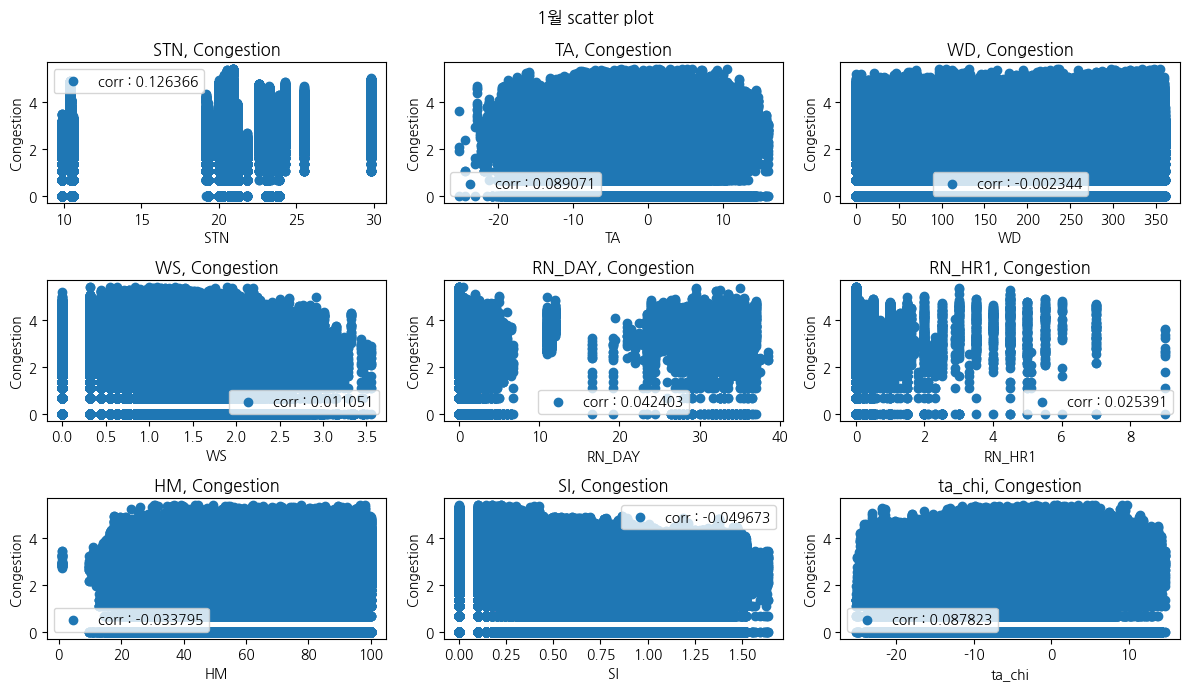

In [25]:
month_scatter_plot(1)

STN, Congestion 상관계수 : 0.118861
TA, Congestion 상관계수 : 0.063061
WD, Congestion 상관계수 : -0.019116
WS, Congestion 상관계수 : -0.010826
RN_DAY, Congestion 상관계수 : -0.03839
RN_HR1, Congestion 상관계수 : -0.014377
HM, Congestion 상관계수 : -0.086605
SI, Congestion 상관계수 : -0.00628
ta_chi, Congestion 상관계수 : 0.071235


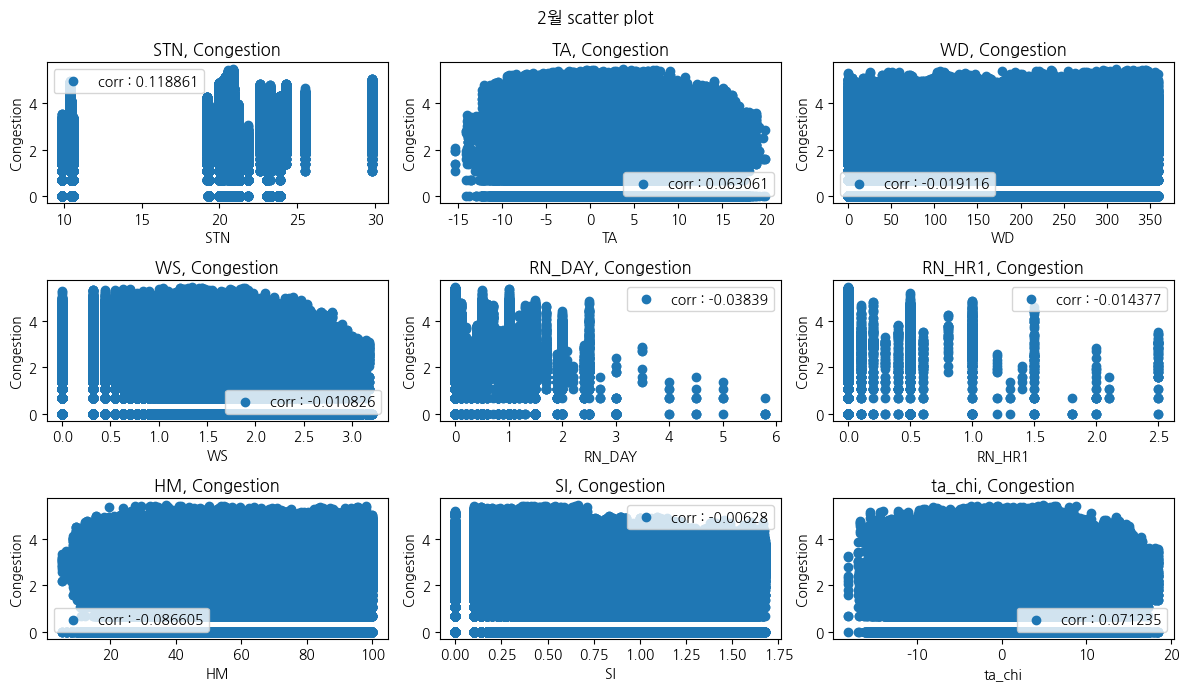

In [26]:
month_scatter_plot(2)

STN, Congestion 상관계수 : 0.11137
TA, Congestion 상관계수 : 0.126034
WD, Congestion 상관계수 : 0.002117
WS, Congestion 상관계수 : 0.000412
RN_DAY, Congestion 상관계수 : -0.112554
RN_HR1, Congestion 상관계수 : -0.076701
HM, Congestion 상관계수 : -0.184245
SI, Congestion 상관계수 : 0.041053
ta_chi, Congestion 상관계수 : 0.134893


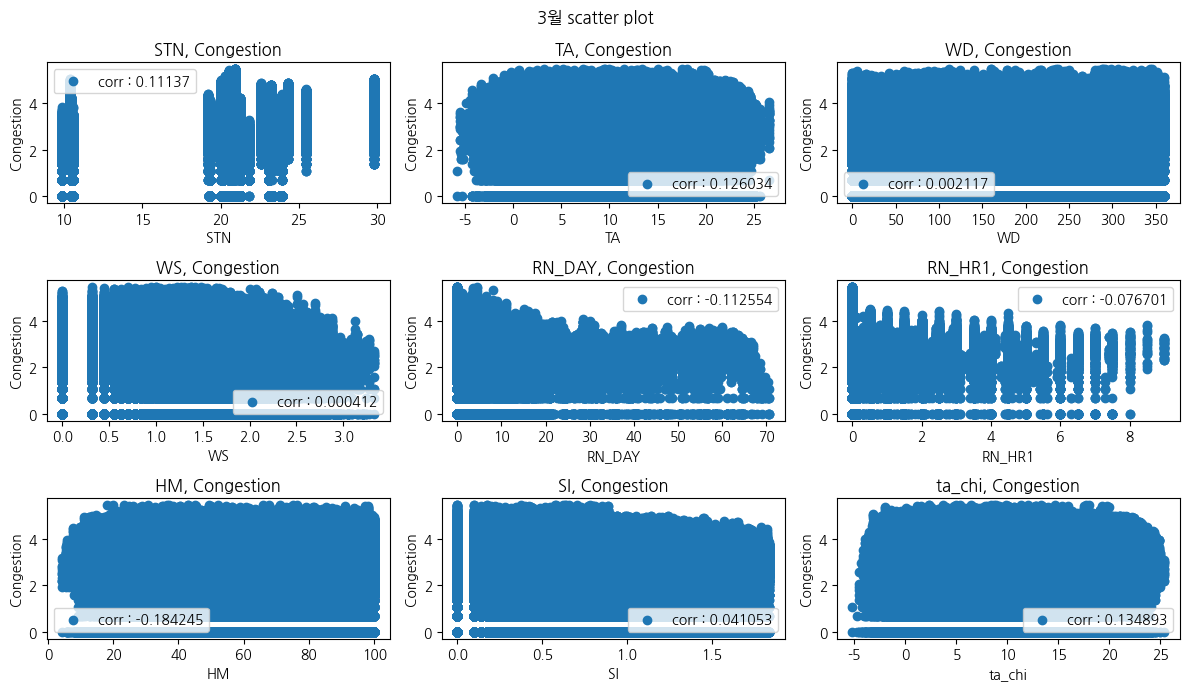

In [27]:
month_scatter_plot(3)

STN, Congestion 상관계수 : 0.103079
TA, Congestion 상관계수 : 0.074468
WD, Congestion 상관계수 : 0.00733
WS, Congestion 상관계수 : 0.030712
RN_DAY, Congestion 상관계수 : 0.012594
RN_HR1, Congestion 상관계수 : -0.007256
HM, Congestion 상관계수 : -0.066686
SI, Congestion 상관계수 : 0.032734
ta_chi, Congestion 상관계수 : 0.077254


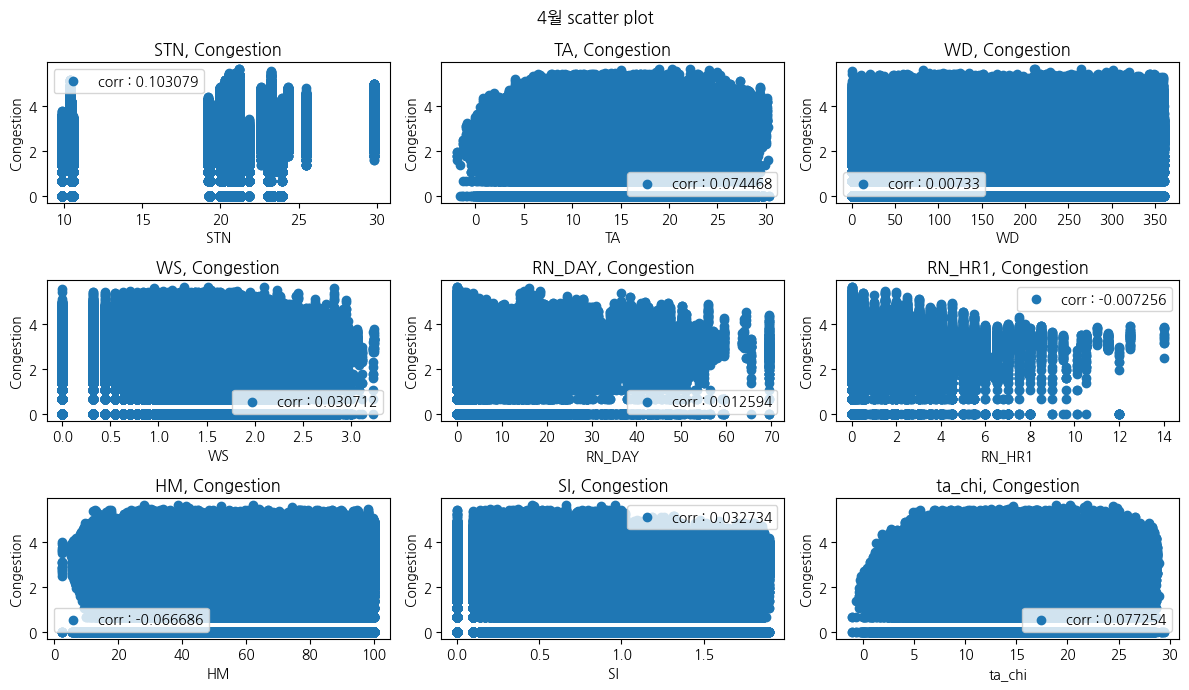

In [28]:
month_scatter_plot(4)

STN, Congestion 상관계수 : 0.103401
TA, Congestion 상관계수 : 0.17058
WD, Congestion 상관계수 : 0.00124
WS, Congestion 상관계수 : 0.038075
RN_DAY, Congestion 상관계수 : -0.043838
RN_HR1, Congestion 상관계수 : -0.043163
HM, Congestion 상관계수 : -0.154097
SI, Congestion 상관계수 : 0.108829
ta_chi, Congestion 상관계수 : 0.136854


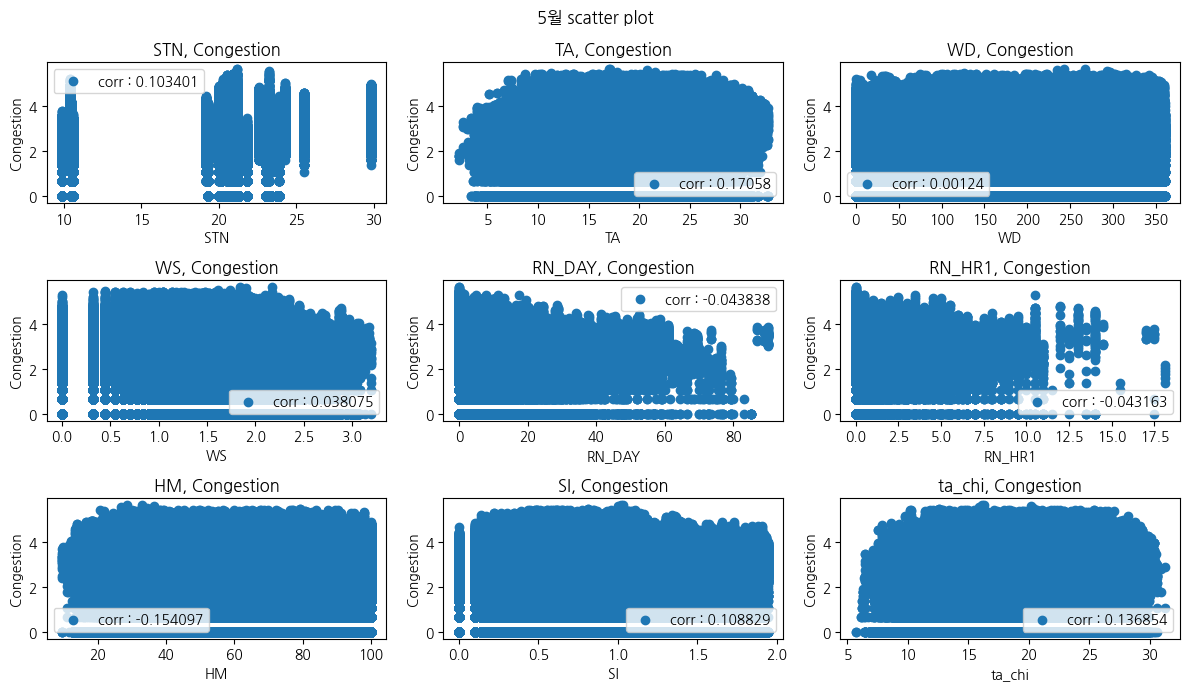

In [29]:
month_scatter_plot(5)

STN, Congestion 상관계수 : 0.112346
TA, Congestion 상관계수 : 0.122285
WD, Congestion 상관계수 : 0.03052
WS, Congestion 상관계수 : 0.032074
RN_DAY, Congestion 상관계수 : 0.001075
RN_HR1, Congestion 상관계수 : -0.008388
HM, Congestion 상관계수 : -0.100121
SI, Congestion 상관계수 : 0.076142
ta_chi, Congestion 상관계수 : 0.098544


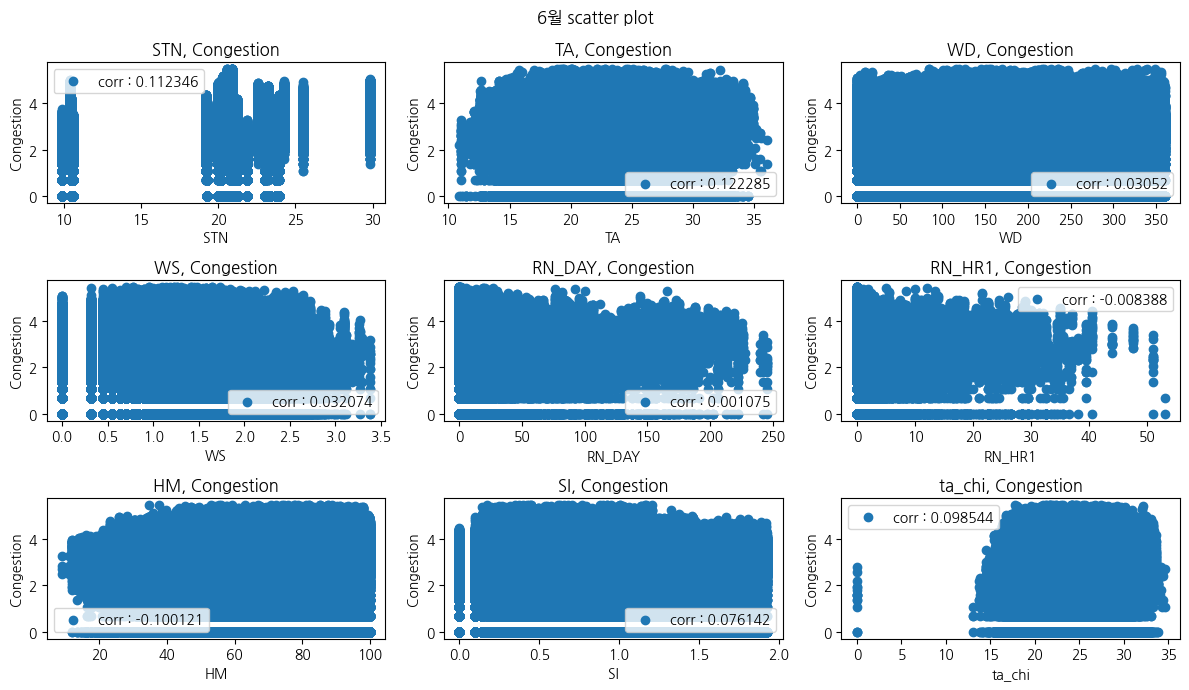

In [30]:
month_scatter_plot(6)

STN, Congestion 상관계수 : 0.122631
TA, Congestion 상관계수 : 0.06079
WD, Congestion 상관계수 : 0.024914
WS, Congestion 상관계수 : 0.047165
RN_DAY, Congestion 상관계수 : 0.03558
RN_HR1, Congestion 상관계수 : 0.013693
HM, Congestion 상관계수 : -0.055906
SI, Congestion 상관계수 : 0.045062
ta_chi, Congestion 상관계수 : 0.049445


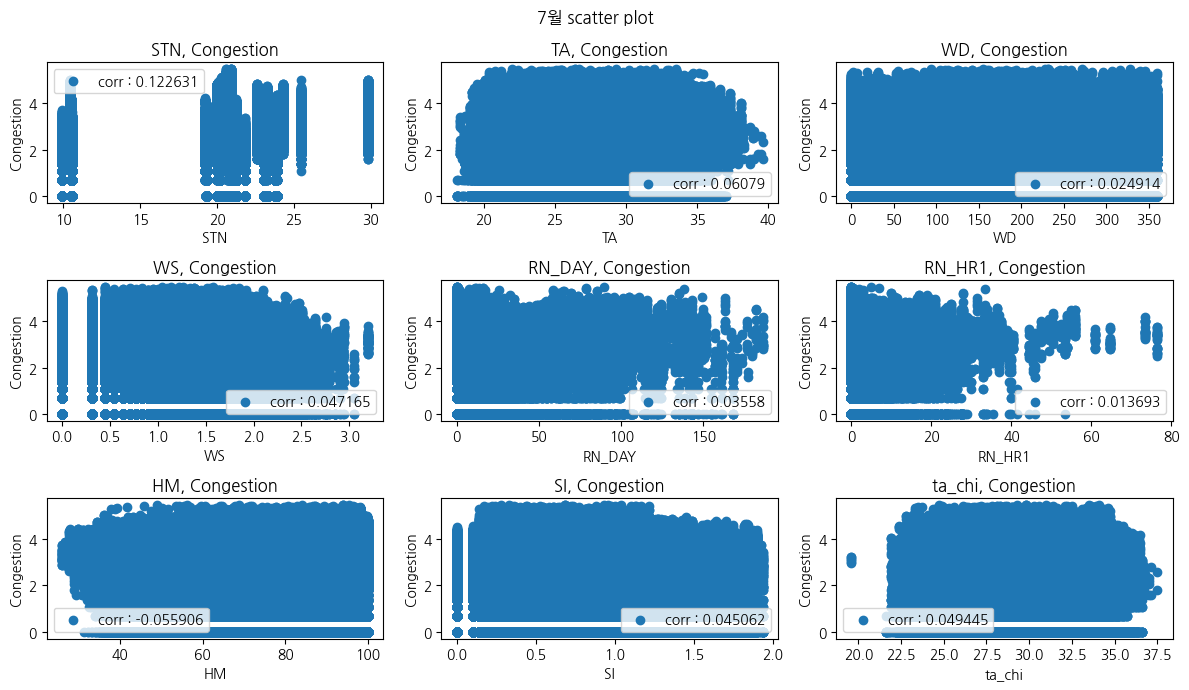

In [31]:
month_scatter_plot(7)

STN, Congestion 상관계수 : 0.122149
TA, Congestion 상관계수 : 0.093967
WD, Congestion 상관계수 : 0.020578
WS, Congestion 상관계수 : 0.064021
RN_DAY, Congestion 상관계수 : 0.001364
RN_HR1, Congestion 상관계수 : 0.005064
HM, Congestion 상관계수 : -0.102945
SI, Congestion 상관계수 : 0.073494
ta_chi, Congestion 상관계수 : 0.073329


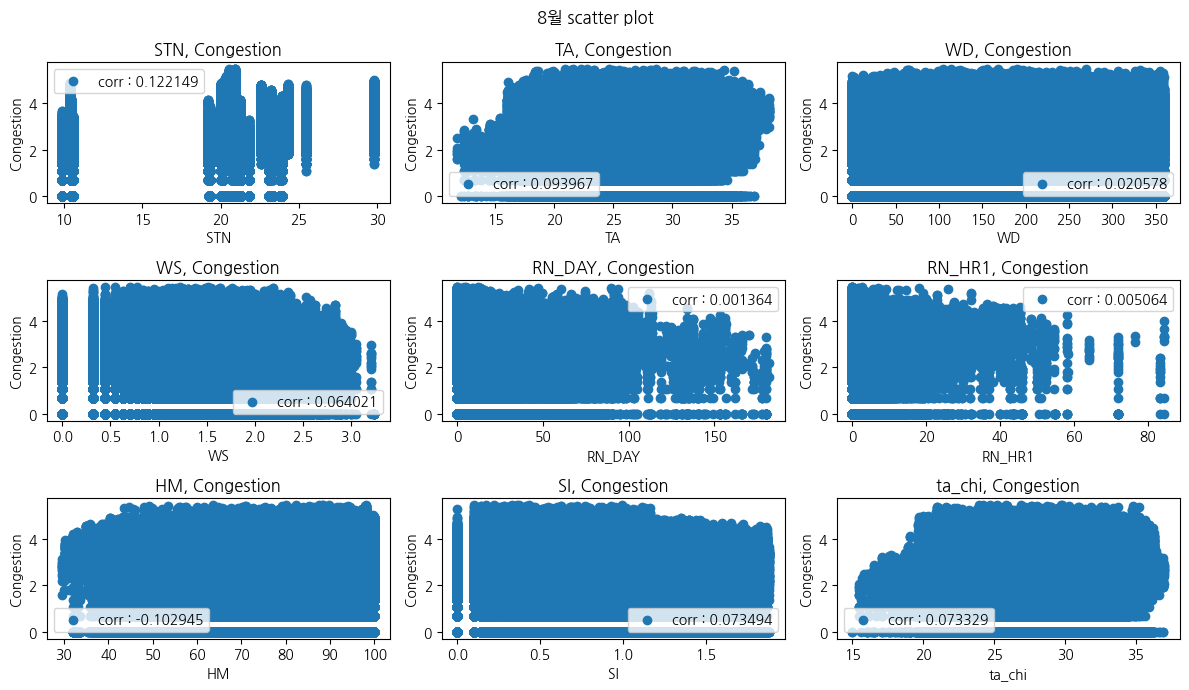

In [32]:
month_scatter_plot(8)

STN, Congestion 상관계수 : 0.121957
TA, Congestion 상관계수 : 0.08979
WD, Congestion 상관계수 : 0.009836
WS, Congestion 상관계수 : 0.055875
RN_DAY, Congestion 상관계수 : -0.04042
RN_HR1, Congestion 상관계수 : -0.014722
HM, Congestion 상관계수 : -0.092029
SI, Congestion 상관계수 : 0.025732
ta_chi, Congestion 상관계수 : 0.068738


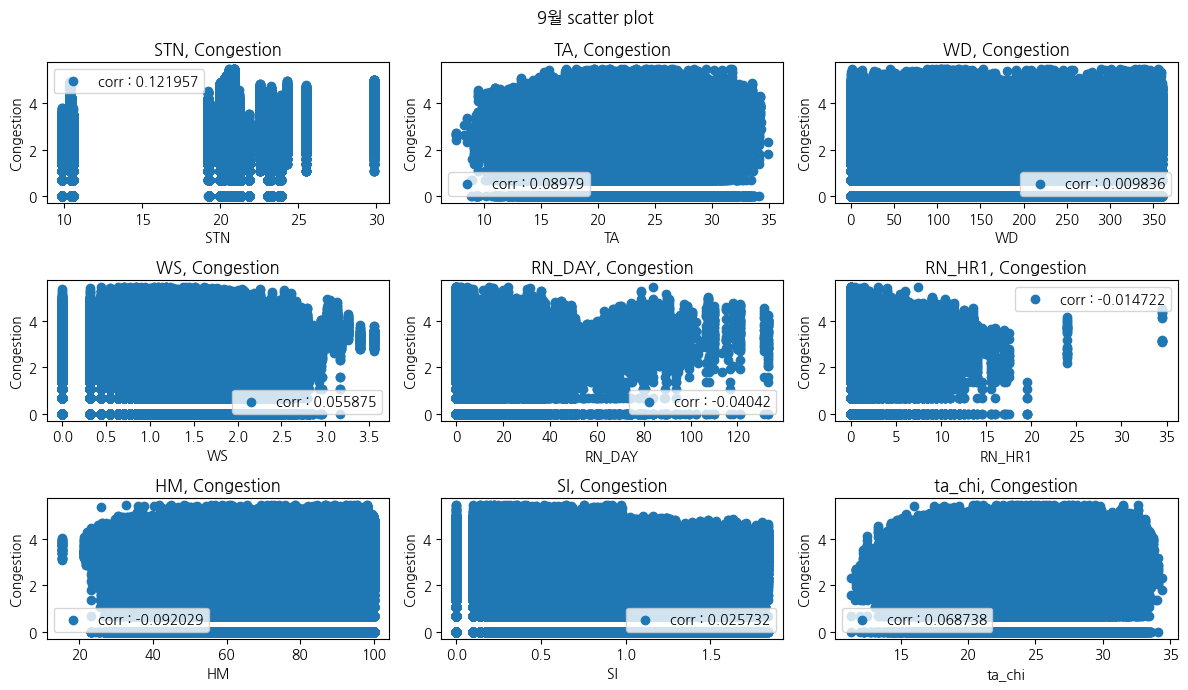

In [33]:
month_scatter_plot(9)

STN, Congestion 상관계수 : 0.135466
TA, Congestion 상관계수 : 0.023595
WD, Congestion 상관계수 : 0.013745
WS, Congestion 상관계수 : 0.020315
RN_DAY, Congestion 상관계수 : -0.052939
RN_HR1, Congestion 상관계수 : -0.017989
HM, Congestion 상관계수 : -0.13198
SI, Congestion 상관계수 : 0.043037
ta_chi, Congestion 상관계수 : 0.028996


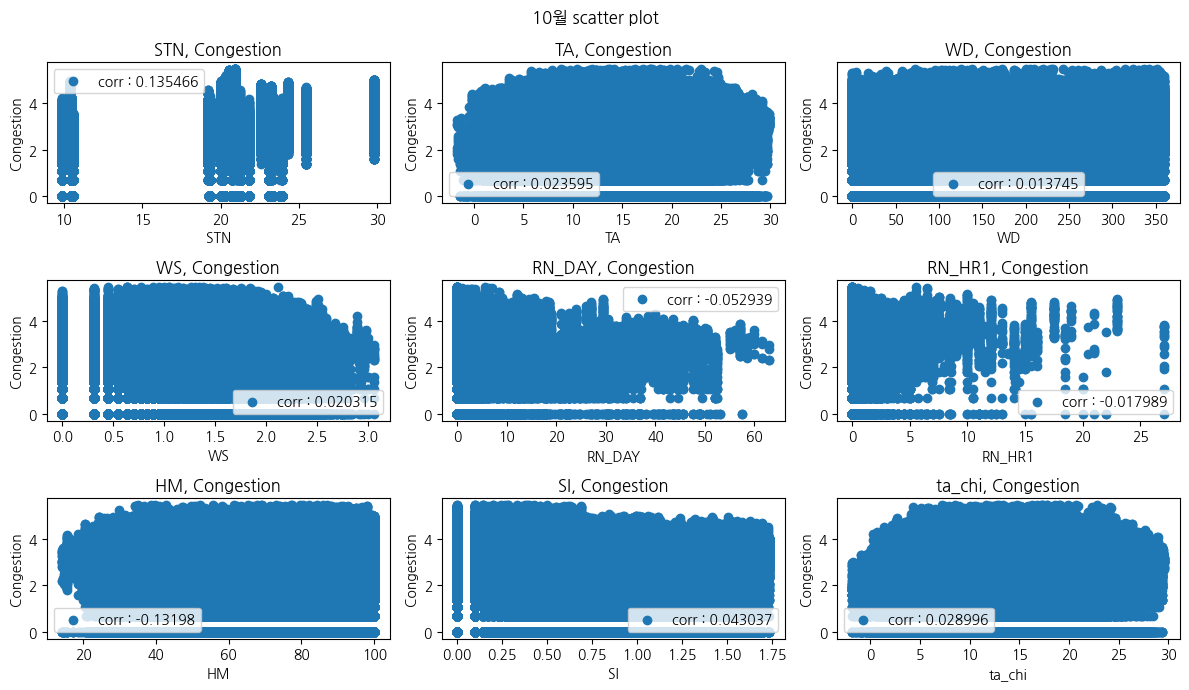

In [34]:
month_scatter_plot(10)

STN, Congestion 상관계수 : 0.134313
TA, Congestion 상관계수 : 0.013393
WD, Congestion 상관계수 : 0.025647
WS, Congestion 상관계수 : 0.025082
RN_DAY, Congestion 상관계수 : -0.01635
RN_HR1, Congestion 상관계수 : -0.015994
HM, Congestion 상관계수 : -0.077939
SI, Congestion 상관계수 : -0.084614
ta_chi, Congestion 상관계수 : 0.016125


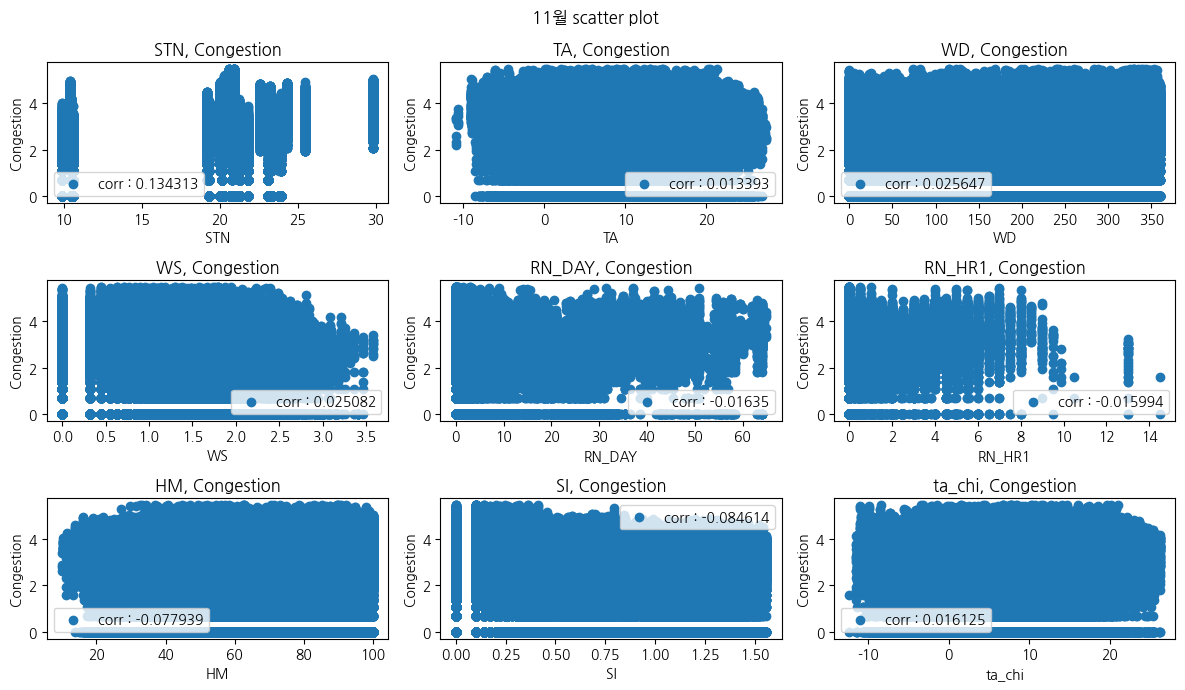

In [35]:
month_scatter_plot(11)

STN, Congestion 상관계수 : 0.109031
TA, Congestion 상관계수 : 0.017271
WD, Congestion 상관계수 : 0.01212
WS, Congestion 상관계수 : 0.022399
RN_DAY, Congestion 상관계수 : 0.036757
RN_HR1, Congestion 상관계수 : 0.017489
HM, Congestion 상관계수 : -0.037298
SI, Congestion 상관계수 : -0.073331
ta_chi, Congestion 상관계수 : 0.016521


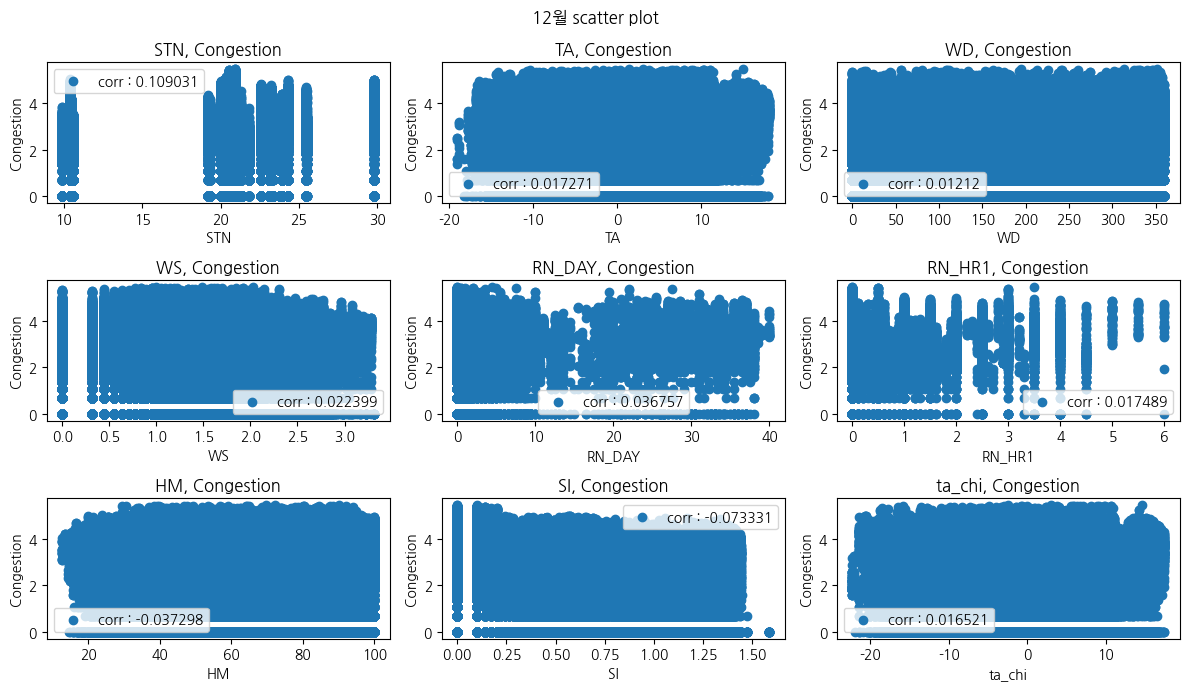

In [36]:
month_scatter_plot(12)

In [37]:
train_subway_df_month_process['season'] = ''

for i in range(train_subway_df_month_process.shape[0]):
    if train_subway_df_month_process.iloc[i,-2] in [3,4,5]:
        train_subway_df_month_process.iloc[i,-1]="봄"
    elif train_subway_df_month_process.iloc[i,-2] in [6,7,8]:
        train_subway_df_month_process.iloc[i,-1]="여름"
    elif train_subway_df_month_process.iloc[i,-2] in [9,10,11]:
        train_subway_df_month_process.iloc[i,-1]="가을"
    else:
        train_subway_df_month_process.iloc[i,-1]="겨울"
    
train_subway_df_month_process

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion,month,season
4259,2021072220,1,150,서울역,상선,20.469489,30.6,288.1,0.836660,0.0,0.0,54.3,0.282843,30.2,2.397895,7,여름
4266,2021072306,1,150,서울역,상선,20.469489,25.8,168.7,0.894427,0.0,0.0,73.5,0.141421,27.2,2.708050,7,여름
4267,2021072307,1,150,서울역,상선,20.469489,27.0,156.9,1.224745,0.0,0.0,71.7,0.632456,28.4,3.496508,7,여름
4268,2021072308,1,150,서울역,상선,20.469489,27.7,162.1,1.264911,0.0,0.0,67.1,0.994987,30.0,3.891820,7,여름
4269,2021072309,1,150,서울역,상선,20.469489,28.1,145.6,1.414214,0.0,0.0,65.9,1.307670,31.1,3.555348,7,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369314,2023123114,8,2828,남위례,하선,23.916521,3.0,306.0,1.048809,7.0,0.0,75.8,0.424264,2.7,2.639057,12,겨울
16369315,2023123115,8,2828,남위례,하선,23.916521,3.7,24.7,1.095445,7.0,0.0,73.0,0.806226,3.5,2.708050,12,겨울
16369316,2023123116,8,2828,남위례,하선,23.916521,4.2,7.0,0.836660,7.0,0.0,71.5,0.812404,3.8,2.833213,12,겨울
16369317,2023123117,8,2828,남위례,하선,23.916521,3.7,303.4,0.447214,7.0,0.0,72.6,0.509902,3.4,2.995732,12,겨울


In [38]:
def season_scatter_plot(season):
    col = 3 
    row = 3 
    column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']
    train_subway_df_choice_season= train_subway_df_month_process[train_subway_df_month_process['season']==season]

    plt.figure(figsize=(12,7))

    for i, colum_name in enumerate(column_list,1):
        plt.subplot(col, row, i)
        plt.title(f'{colum_name}, Congestion')
        corr_result = train_subway_df_choice_season.corr(numeric_only=True)['Congestion'][colum_name]
        plt.scatter(train_subway_df_choice_season[colum_name], train_subway_df_choice_season['Congestion'], label=f'corr : {round(corr_result,6)}')
        print(f'{colum_name}, Congestion 상관계수 : {round(corr_result,6)}')
        plt.xlabel(colum_name)
        plt.ylabel('Congestion')
        plt.legend(loc="best")

    plt.suptitle(f"{season} scatter plot")
    plt.tight_layout()
    plt.show()

STN, Congestion 상관계수 : 0.105508
TA, Congestion 상관계수 : 0.096779
WD, Congestion 상관계수 : 0.003495
WS, Congestion 상관계수 : 0.025326
RN_DAY, Congestion 상관계수 : -0.044517
RN_HR1, Congestion 상관계수 : -0.039262
HM, Congestion 상관계수 : -0.131746
SI, Congestion 상관계수 : 0.06349
ta_chi, Congestion 상관계수 : 0.084646


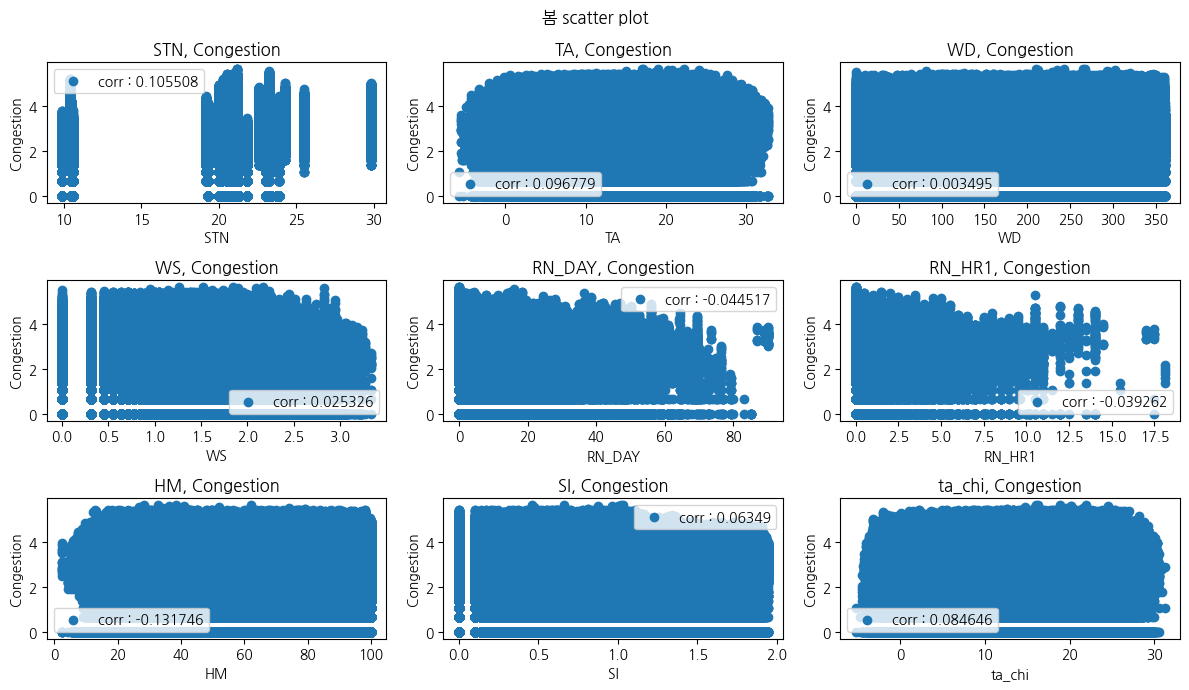

In [39]:
season_scatter_plot("봄")

STN, Congestion 상관계수 : 0.119329
TA, Congestion 상관계수 : 0.068887
WD, Congestion 상관계수 : 0.027043
WS, Congestion 상관계수 : 0.049081
RN_DAY, Congestion 상관계수 : 0.010933
RN_HR1, Congestion 상관계수 : 0.003079
HM, Congestion 상관계수 : -0.091715
SI, Congestion 상관계수 : 0.067206
ta_chi, Congestion 상관계수 : 0.043158


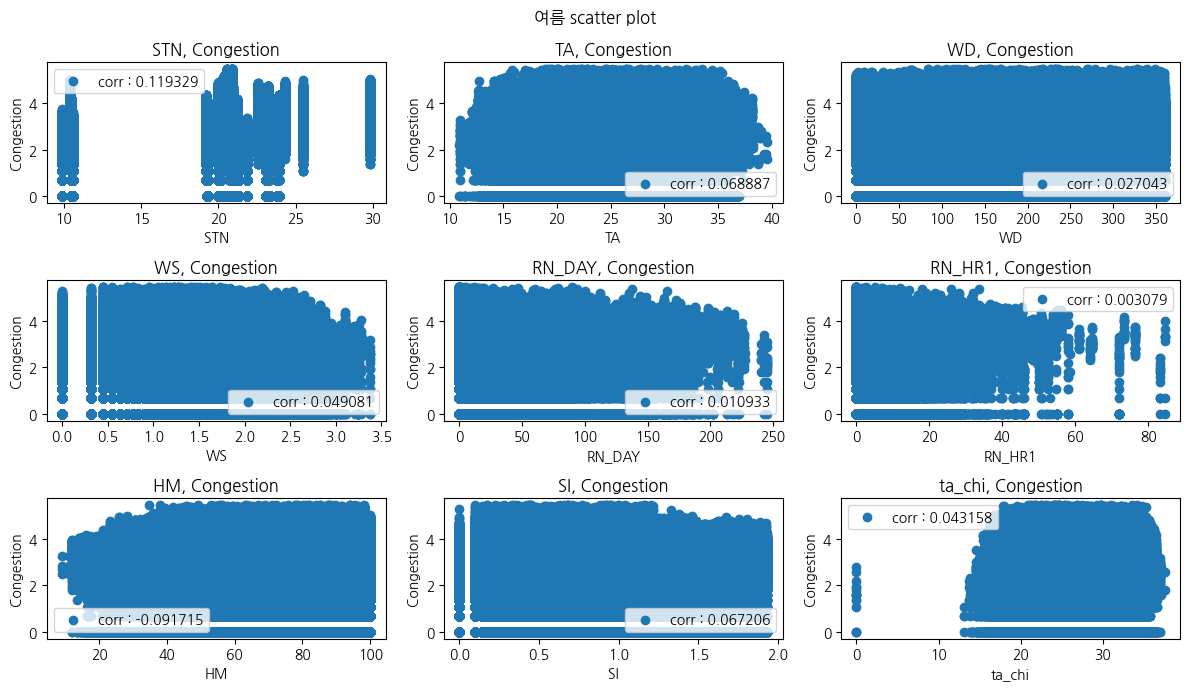

In [40]:
season_scatter_plot("여름")

STN, Congestion 상관계수 : 0.129619
TA, Congestion 상관계수 : -0.03519
WD, Congestion 상관계수 : 0.031198
WS, Congestion 상관계수 : 0.034957
RN_DAY, Congestion 상관계수 : -0.040568
RN_HR1, Congestion 상관계수 : -0.019284
HM, Congestion 상관계수 : -0.112815
SI, Congestion 상관계수 : -0.006896
ta_chi, Congestion 상관계수 : -0.042562


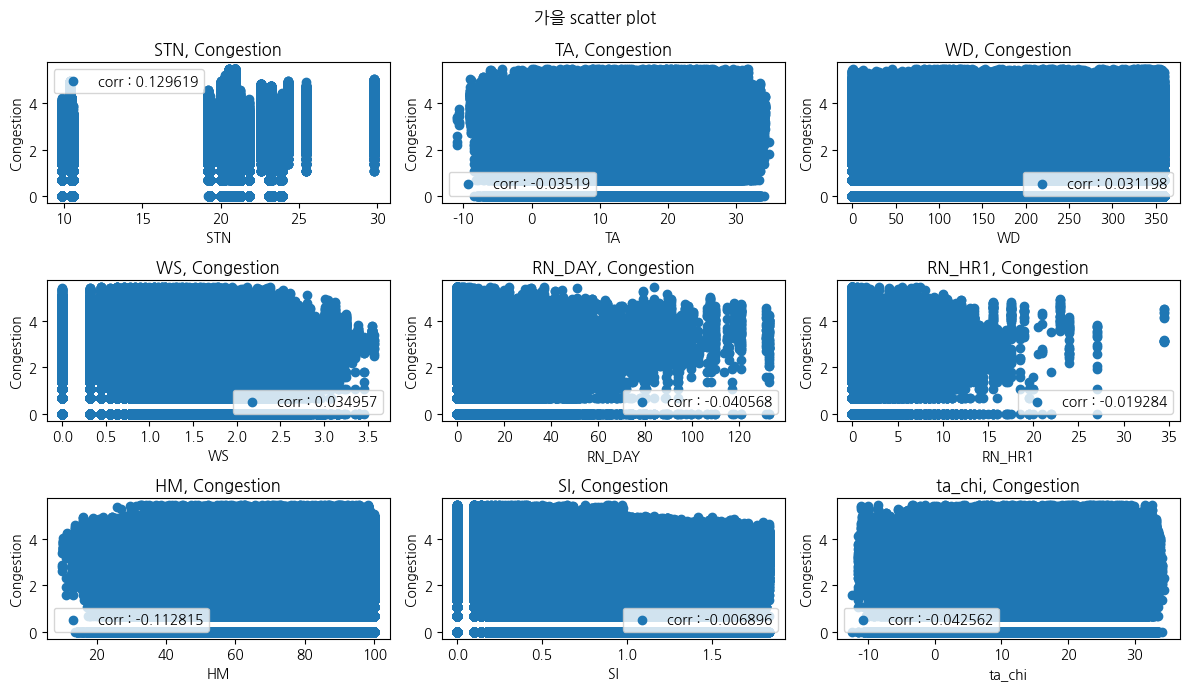

In [41]:
season_scatter_plot("가을")

STN, Congestion 상관계수 : 0.11779
TA, Congestion 상관계수 : 0.0543
WD, Congestion 상관계수 : -0.002614
WS, Congestion 상관계수 : 0.006772
RN_DAY, Congestion 상관계수 : 0.033659
RN_HR1, Congestion 상관계수 : 0.019503
HM, Congestion 상관계수 : -0.042388
SI, Congestion 상관계수 : -0.048226
ta_chi, Congestion 상관계수 : 0.056386


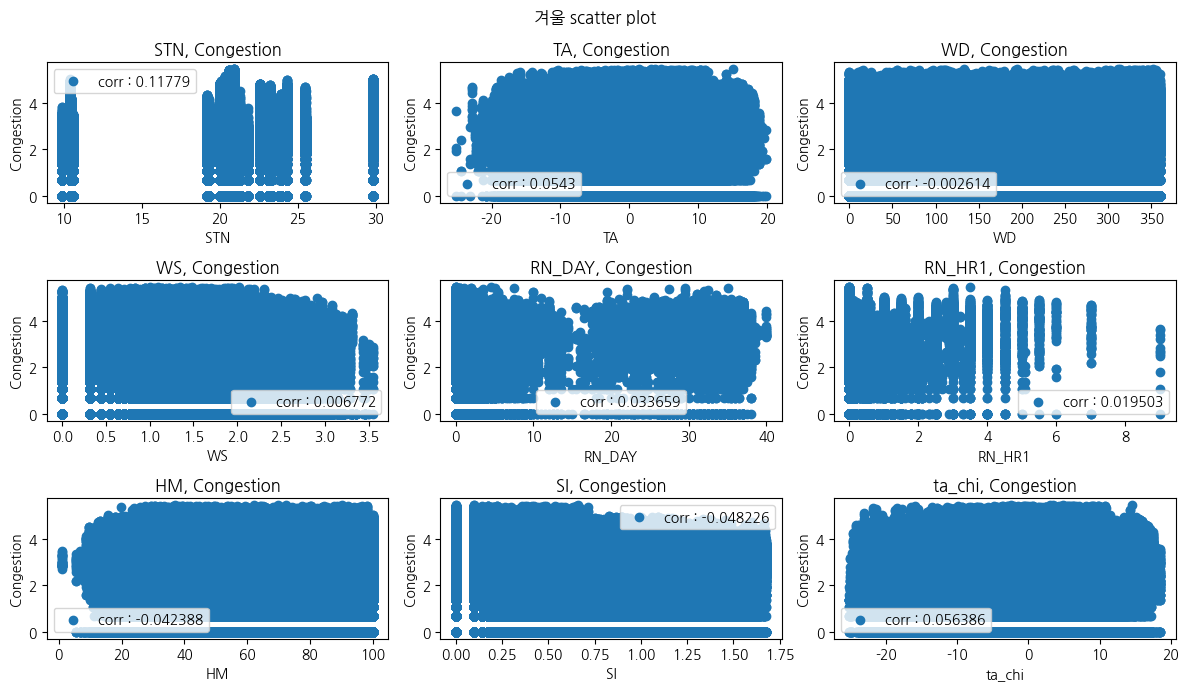

In [42]:
season_scatter_plot("겨울")